In [80]:
import matplotlib.pyplot as plt
import pandas as pd
df = pd.read_excel("C:\\Users\\Matvei\\Desktop\\CoffeeProject\\Coffee Shop Sales.xlsx")
df['hour'] = pd.to_datetime(df['transaction_time'], format='%H:%M:%S').dt.hour

In [47]:
df.head()

,transaction_id,transaction_date,transaction_time,transaction_qty,store_id,store_location,product_id,unit_price,product_category,product_type,product_detail,hour
0,1,2023-01-01,07:06:11,2,5,Lower Manhattan,32,3.0,Coffee,Gourmet brewed coffee,Ethiopia Rg,7
1,2,2023-01-01,07:08:56,2,5,Lower Manhattan,57,3.1,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg,7
2,3,2023-01-01,07:14:04,2,5,Lower Manhattan,59,4.5,Drinking Chocolate,Hot chocolate,Dark chocolate Lg,7
3,4,2023-01-01,07:20:24,1,5,Lower Manhattan,22,2.0,Coffee,Drip coffee,Our Old Time Diner Blend Sm,7
4,5,2023-01-01,07:22:41,2,5,Lower Manhattan,57,3.1,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg,7


In [48]:
df.isnull().sum()

transaction_id      0
transaction_date    0
transaction_time    0
transaction_qty     0
store_id            0
store_location      0
product_id          0
unit_price          0
product_category    0
product_type        0
product_detail      0
hour                0
dtype: int64

In [61]:
df.duplicated().sum()

0

In [49]:
df[['transaction_qty', 'unit_price']].describe()

,transaction_qty,unit_price
count,149116.000000,149116.000000
mean,1.438276,3.382219
std,0.542509,2.658723
min,1.000000,0.800000
25%,1.000000,2.500000
50%,1.000000,3.000000
75%,2.000000,3.750000
max,8.000000,45.000000


In [50]:
(df['transaction_qty'] < 0).sum()
(df['unit_price'] < 0).sum()

0

In [51]:
df[df['transaction_qty'] > 5]  # Транзакции с более чем 5 товарами
df[df['unit_price'] > 20]     # Товары дороже 20

,transaction_id,transaction_date,transaction_time,transaction_qty,store_id,store_location,product_id,unit_price,product_category,product_type,product_detail,hour
3293,3323,2023-01-07,07:44:17,1,5,Lower Manhattan,6,21.0,Coffee beans,Gourmet Beans,Ethiopia,7
3296,3326,2023-01-07,07:45:15,1,5,Lower Manhattan,9,28.0,Coffee beans,Organic Beans,Organic Decaf Blend,7
3302,3332,2023-01-07,07:50:42,1,5,Lower Manhattan,9,28.0,Coffee beans,Organic Beans,Organic Decaf Blend,7
3408,3438,2023-01-07,09:05:19,1,5,Lower Manhattan,9,28.0,Coffee beans,Organic Beans,Organic Decaf Blend,9
3493,3523,2023-01-07,10:14:20,1,5,Lower Manhattan,6,21.0,Coffee beans,Gourmet Beans,Ethiopia,10
...,...,...,...,...,...,...,...,...,...,...,...,...
148246,148587,2023-06-30,08:23:47,1,8,Hell's Kitchen,6,21.0,Coffee beans,Gourmet Beans,Ethiopia,8
148363,148704,2023-06-30,09:11:01,1,5,Lower Manhattan,6,21.0,Coffee beans,Gourmet Beans,Ethiopia,9
148573,148914,2023-06-30,10:25:26,1,8,Hell's Kitchen,8,45.0,Coffee beans,Premium Beans,Civet Cat,10
148702,149043,2023-06-30,11:18:31,8,8,Hell's Kitchen,8,45.0,Coffee beans,Premium Beans,Civet Cat,11


In [52]:
stores = df[['store_id', 'store_location']].drop_duplicates().reset_index(drop=True)
print(stores)

   store_id   store_location
0         5  Lower Manhattan
1         8   Hell's Kitchen
2         3          Astoria


In [53]:
products = df[['product_id', 'product_category', 'product_type', 'product_detail', 'unit_price']].drop_duplicates().reset_index(drop=True)
print(products.head())

   product_id    product_category           product_type  \
0          32              Coffee  Gourmet brewed coffee   
1          57                 Tea        Brewed Chai tea   
2          59  Drinking Chocolate          Hot chocolate   
3          22              Coffee            Drip coffee   
4          77              Bakery                  Scone   

                product_detail  unit_price  
0                  Ethiopia Rg         3.0  
1     Spicy Eye Opener Chai Lg         3.1  
2            Dark chocolate Lg         4.5  
3  Our Old Time Diner Blend Sm         2.0  
4                Oatmeal Scone         3.0  


In [54]:
transactions = df[['transaction_id', 'transaction_date', 'transaction_time', 'transaction_qty', 'store_id', 'product_id']]
print(transactions.head())

   transaction_id transaction_date transaction_time  transaction_qty  \
0               1       2023-01-01         07:06:11                2   
1               2       2023-01-01         07:08:56                2   
2               3       2023-01-01         07:14:04                2   
3               4       2023-01-01         07:20:24                1   
4               5       2023-01-01         07:22:41                2   

   store_id  product_id  
0         5          32  
1         5          57  
2         5          59  
3         5          22  
4         5          57  


In [55]:
df['product_category'].value_counts()

product_category
Coffee                58416
Tea                   45449
Bakery                22796
Drinking Chocolate    11468
Flavours               6790
Coffee beans           1753
Loose Tea              1210
Branded                 747
Packaged Chocolate      487
Name: count, dtype: int64

In [56]:
df['hour'].value_counts().sort_index()

hour
6      4594
7     13428
8     17654
9     17764
10    18545
11     9766
12     8708
13     8714
14     8933
15     8979
16     9093
17     8745
18     7498
19     6092
20      603
Name: count, dtype: int64

In [59]:
df['total_amount'] = df['transaction_qty'] * df['unit_price']
df.groupby('store_location')['total_amount'].mean()

store_location
Astoria            4.589891
Hell's Kitchen     4.661696
Lower Manhattan    4.814726
Name: total_amount, dtype: float64

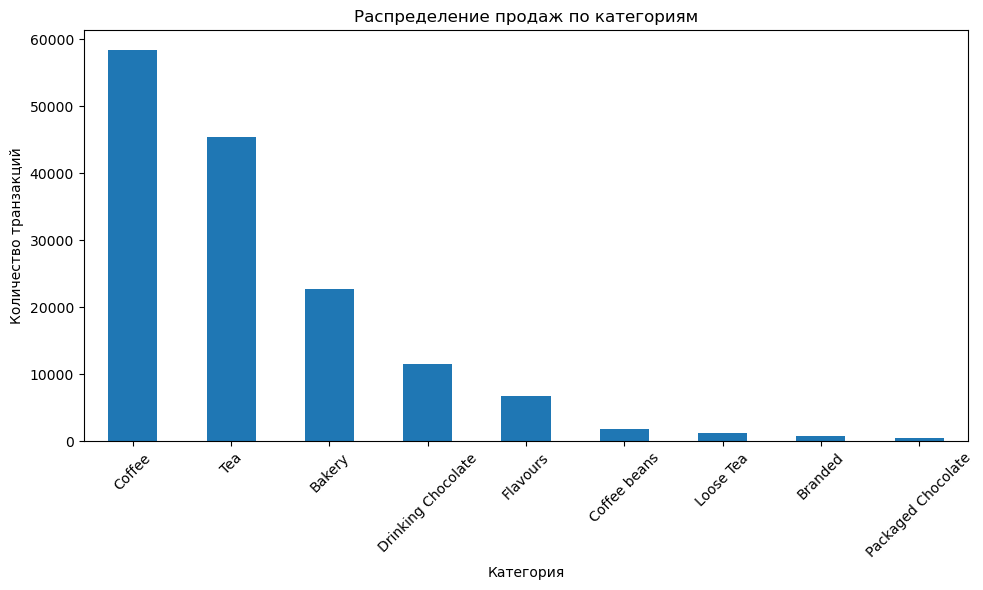

In [64]:
category_counts = df['product_category'].value_counts()
plt.figure(figsize=(10, 6))
category_counts.plot(kind='bar')
plt.title('Распределение продаж по категориям')
plt.xlabel('Категория')
plt.ylabel('Количество транзакций')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

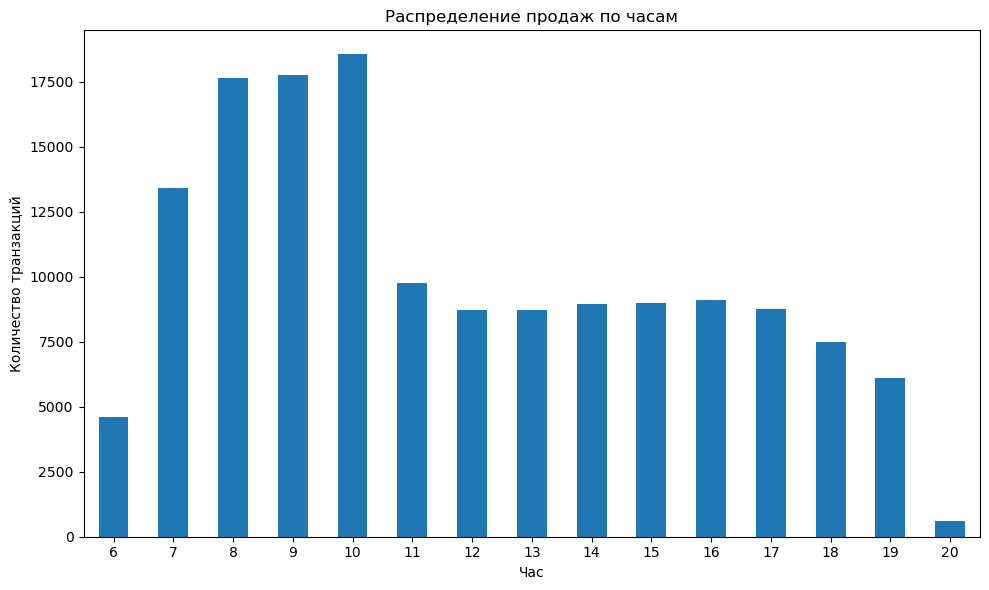

In [78]:
hour_counts = df['hour'].value_counts().sort_index()
plt.figure(figsize=(10, 6))
hour_counts.plot(kind='bar')
plt.title('Распределение продаж по часам')
plt.xlabel('Час')
plt.ylabel('Количество транзакций')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

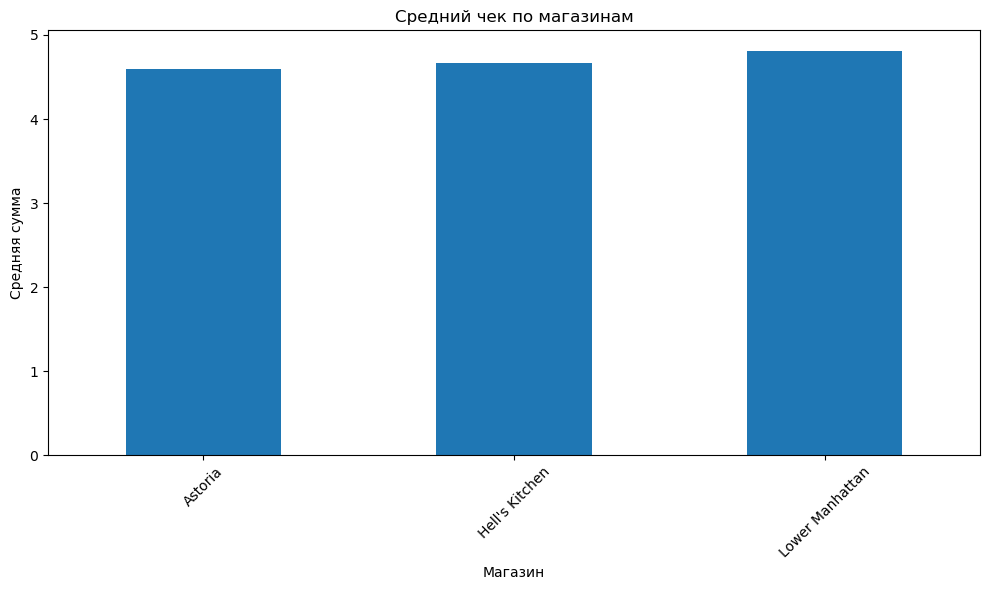

In [81]:
df['total_amount'] = df['transaction_qty'] * df['unit_price']
store_avg = df.groupby('store_location')['total_amount'].mean()
plt.figure(figsize=(10, 6))
store_avg.plot(kind='bar')
plt.title('Средний чек по магазинам')
plt.xlabel('Магазин')
plt.ylabel('Средняя сумма')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
### Итоги анализа:

**Очистка данных:**
- Пропуски: Проверено с помощью `df.isnull().sum()` — пропусков нет.
- Дубликаты: Проверено с помощью `df.duplicated().sum()` — дубликатов нет.
- Аномалии: Анализ `transaction_qty` (1–8) и `unit_price` (0.8–45) показал, что данные в пределах нормы.

**Оптимизация хранения:**
- Данные разделены на таблицы:
  - `stores`: Уникальные магазины (`store_id`, `store_location`).
  - `products`: Уникальные продукты (`product_id`, `product_category`, `product_type`, `product_detail`, `unit_price`).
  - `transactions`: Транзакции (`transaction_id`, `transaction_date`, `transaction_time`, `transaction_qty`, `store_id`, `product_id`).

**Гипотезы и визуализация:**
- Самая популярная категория — Coffee (~58%), подтверждено графиком распределения продаж по категориям. Рекомендация: расширить ассортимент кофе.
- Пиковые часы продаж — 7–11 утра, подтверждено графиком продаж по часам. Рекомендация: запустить утренние акции.
- Средний чек по магазинам стабилен (~4.7), но можно изучить, где продаются дорогие товары (график среднего чека).

**Вывод:**
Данные очищены, оптимизированы и проанализированы. Визуализация подтверждает гипотезы, которые могут быть использованы для улучшения бизнеса кофейни.